In [102]:
import pandas as pd
import numpy as np
import datetime
import json
import time
import matplotlib.pyplot as plt

In [3]:
df_arch = pd.read_csv('/content/twitter-archive-enhanced.csv')

In [5]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_arch.shape

(2356, 17)

In [4]:
file_name = '/content/image-predictions.tsv'
df_pred = pd.read_csv(file_name, sep='\t')
print(df_pred.head())

             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheep

In [7]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_pred.shape

(2075, 12)

In [15]:
file_name = 'tweet_json.txt'

In [16]:
# Extract selected Twitter API data from file to a list
tweet_list = []

with open(file_name) as file:
    tweets = json.load(file)
    for tweet in tweets:
        tweet_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count'],
                        'followers_count': tweet['user']['followers_count']})

In [17]:
df_api = pd.DataFrame(tweet_list, columns = ['tweet_id',
                                            'retweet_count',
                                            'favorite_count',
                                            'followers_count'])

In [18]:
df_api.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8377,38250,7418513
1,892177421306343426,6185,32791,7418513
2,891815181378084864,4092,24693,7420630
3,891689557279858688,8519,41578,7418513
4,891327558926688256,9227,39754,7418513


In [19]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_arch[~df_arch['in_reply_to_user_id'].isnull()].T
# Show all records with not null values under in_reply_to_user_id column

,30,55,64,113,148,149,179,184,186,188,...,1895,1905,1914,1940,2036,2038,2149,2169,2189,2298
tweet_id,886267009285017600,881633300179243008,879674319642796034,870726314365509632,863427515083354112,863079547188785154,857214891891077121,856526610513747968,856288084350160898,855862651834028034,...,674742531037511680,674606911342424069,674330906434379776,673716320723169284,671729906628341761,671550332464455680,669684865554620416,669353438988365824,668967877119254528,667070482143944705
in_reply_to_status_id,886266357075128320.0,881607037314052096.0,879553827334172672.0,870726202742493184.0,863425645568774144.0,667152164079423488.0,857156678055342080.0,855818117272018944.0,856286004109553664.0,855861584463351808.0,...,674739953134403584.0,674468880899788800.0,665814696700723200.0,673715861853720576.0,671561002136281088.0,671544874165002240.0,669354382627049472.0,667806454573760512.0,668920717132582912.0,667065535570550784.0
in_reply_to_user_id,2281181600.0,47384430.0,3105440746.0,16487760.0,77596200.0,4196983835.0,180670967.0,4196983835.0,279280991.0,194351775.0,...,4196983835.0,4196983835.0,16374678.0,4196983835.0,4196983835.0,4196983835.0,4196983835.0,4196983835.0,21435658.0,4196983835.0
timestamp,2017-07-15 16:51:35 +0000,2017-07-02 21:58:53 +0000,2017-06-27 12:14:36 +0000,2017-06-02 19:38:25 +0000,2017-05-13 16:15:35 +0000,2017-05-12 17:12:53 +0000,2017-04-26 12:48:51 +0000,2017-04-24 15:13:52 +0000,2017-04-23 23:26:03 +0000,2017-04-22 19:15:32 +0000,...,2015-12-10 00:08:50 +0000,2015-12-09 15:09:55 +0000,2015-12-08 20:53:11 +0000,2015-12-07 04:11:02 +0000,2015-12-01 16:37:44 +0000,2015-12-01 04:44:10 +0000,2015-11-26 01:11:28 +0000,2015-11-25 03:14:30 +0000,2015-11-24 01:42:25 +0000,2015-11-18 20:02:51 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",...,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,@roushfenway These are good dogs but 17/10 is ...,@RealKentMurphy 14/10 confirmed,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,@Jack_Septic_Eye I'd need a few more pics to p...,Ladies and gentlemen... I found Pipsy. He may ...,@Marc_IRL pixelated af 12/10,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,@dhmontgomery We also gave snoop dogg a 420/10...,...,Some clarification is required. The dog is sin...,The 13/10 also takes into account this impecca...,13/10\n@ABC7,The millennials have spoken and we've decided ...,I'm just going to leave this one here as well....,After 22 minutes of careful deliberation this ...,After countless hours of research and hundreds...,This is Tessa. She is also very pleased after ...,12/10 good shit Bubka\n@wane15,After much debate this dog is being upgraded t...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,N

In [21]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2342 non-null   int64
 1   retweet_count    2342 non-null   int64
 2   favorite_count   2342 non-null   int64
 3   followers_count  2342 non-null   int64
dtypes: int64(4)
memory usage: 73.3 KB


In [54]:
# Make copies to preserve the original datasets
df_arch_clean = df_arch.copy()
df_pred_clean = df_pred.copy()
df_api_clean = df_api.copy()

In [55]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [56]:
# Find rows to remove for replies
# They do not have NaNs in 'in_reply_to_status_id'
replies = (~df_arch_clean.in_reply_to_status_id.isnull())
df_arch_clean = df_arch_clean[~replies]

In [57]:
# Find rows to remove for retweets
# They do not have NaNs in 'retweeted_status_id'
retweets = (~df_arch_clean.retweeted_status_id.isnull())
df_arch_clean = df_arch_clean[~retweets]

In [58]:
df_arch_clean.drop(['in_reply_to_status_id',
                    'in_reply_to_user_id',
                    'retweeted_status_id',
                    'retweeted_status_user_id',
                    'retweeted_status_timestamp'], axis=1, inplace=True)

In [59]:
# After rows are removed
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [60]:
# Change timestamp
df_arch_clean.timestamp = pd.to_datetime(df_arch_clean.timestamp)

In [61]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2342 non-null   int64
 1   favorite_count  2342 non-null   int64
 2   retweet_count   2342 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [62]:
# Change None to NaN
def change_to_null(item):
    if item == 'None':
        item = np.NaN
    return item

df_arch_clean['name'] = [change_to_null(item) for item in df_arch_clean['name']]

df_arch_clean['doggo'] = [change_to_null(item) for item in df_arch_clean['doggo']]
df_arch_clean['floofer'] = [change_to_null(item) for item in df_arch_clean['floofer']]
df_arch_clean['pupper'] = [change_to_null(item) for item in df_arch_clean['pupper']]
df_arch_clean['puppo'] = [change_to_null(item) for item in df_arch_clean['puppo']]

In [63]:
df_arch_clean.drop(['expanded_urls'], axis=1, inplace=True)

In [64]:
df_arch_clean['dog_style'] = df_arch_clean.doggo.fillna(df_arch_clean.floofer.fillna(df_arch_clean.pupper.fillna(df_arch_clean.puppo)))

# Test values assignment
df_arch_clean[['dog_style', 'doggo', 'floofer', 'pupper', 'puppo']].T

,0,1,2,3,4,5,6,7,8,9,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
dog_style,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pupper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_arch_clean.drop(['doggo',
                    'floofer',
                    'pupper',
                    'puppo'], axis=1, inplace=True)

In [66]:
df_arch_clean.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
timestamp,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...
rating_numerator,13,13,12,13,12
rating_denominator,10,10,10,10,10
name,Phineas,Tilly,Archie,Darla,Franklin
dog_style,NaN,NaN,NaN,NaN,NaN


In [67]:
df_arch_clean['rating'] = df_arch_clean.rating_numerator / df_arch_clean.rating_denominator
#we merged the numerator and denominator to 1 columne called rating which is n/d

In [68]:

# Replace invalid dog names with np.nan
invalid_names = ['a','A', 'an', 'None']
df_arch_clean['name'] = df_arch_clean['name'].replace(invalid_names, np.nan)

# Remove rows with invalid dog names
df_arch_clean = df_arch_clean.dropna(subset=['name'])

In [69]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 2346
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1433 non-null   int64              
 1   timestamp           1433 non-null   datetime64[ns, UTC]
 2   source              1433 non-null   object             
 3   text                1433 non-null   object             
 4   rating_numerator    1433 non-null   int64              
 5   rating_denominator  1433 non-null   int64              
 6   name                1433 non-null   object             
 7   dog_style           194 non-null    object             
 8   rating              1433 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 112.0+ KB


In [70]:
df_arch_clean.rating.describe()

count    1433.000000
mean        1.203534
std         4.670674
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [71]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2342 non-null   int64
 1   favorite_count  2342 non-null   int64
 2   retweet_count   2342 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [72]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 2346
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1433 non-null   int64              
 1   timestamp           1433 non-null   datetime64[ns, UTC]
 2   source              1433 non-null   object             
 3   text                1433 non-null   object             
 4   rating_numerator    1433 non-null   int64              
 5   rating_denominator  1433 non-null   int64              
 6   name                1433 non-null   object             
 7   dog_style           194 non-null    object             
 8   rating              1433 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 112.0+ KB


In [73]:
# Identify tweet_ids in df_arch_clean but not in df_api_clean
not_shared = (~df_arch_clean.tweet_id.isin(list(df_api_clean.tweet_id)))
not_shared.sum()

1

In [74]:
# Remove these tweets
df_arch_clean = df_arch_clean[~not_shared]

In [75]:
# Check if any tweet left
not_shared = (~df_arch_clean.tweet_id.isin(list(df_api_clean.tweet_id)))
not_shared.sum()

0

In [76]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2342 non-null   int64
 1   favorite_count  2342 non-null   int64
 2   retweet_count   2342 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [77]:
# Select columns to be used for the analysis
id = []
favorite_count = []
retweet_count = []
created_at = []
for value in tweets:
  id.append(value['id'])
  favorite_count.append(value['favorite_count'])
  retweet_count.append(value['retweet_count'])
  date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(value['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
  created_at.append(date)


dict = {

    'tweet_id' : id,
    'favorite_count' : favorite_count,
    'retweet_count' : retweet_count,
    }

df_pred = pd.DataFrame(dict)



In [78]:
# Update rating_denominator values
df_arch_clean.loc[df_arch_clean['rating_denominator'] > 10, 'rating_denominator'] = 10
df_arch_clean.loc[df_arch_clean['rating_denominator'] <= 0, 'rating_denominator'] = 1

# Update rating_numerator values
df_arch_clean.loc[df_arch_clean['rating_numerator'] > 10, 'rating_numerator'] = 10
df_arch_clean.loc[df_arch_clean['rating_numerator'] <= 0, 'rating_numerator'] = 1

In [79]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2342 non-null   int64
 1   favorite_count  2342 non-null   int64
 2   retweet_count   2342 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [80]:
df_pred.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
favorite_count,38250,32791,24693,41578,39754
retweet_count,8377,6185,4092,8519,9227


In [81]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 2346
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1432 non-null   int64              
 1   timestamp           1432 non-null   datetime64[ns, UTC]
 2   source              1432 non-null   object             
 3   text                1432 non-null   object             
 4   rating_numerator    1432 non-null   int64              
 5   rating_denominator  1432 non-null   int64              
 6   name                1432 non-null   object             
 7   dog_style           194 non-null    object             
 8   rating              1432 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 111.9+ KB


In [82]:
# Merge the data frames
df_merged = pd.merge(df_arch_clean, df_pred_clean, on='tweet_id', how='inner')
df_merged = pd.merge(df_merged, df_api_clean, on='tweet_id', how='inner')

# Save the merged data frame to a CSV file
df_merged.to_csv('twitter_archive_master.csv', index=False)


In [83]:
df_merged = df_merged.drop(['rating_numerator', 'rating_denominator'], axis=1)

In [96]:
df_merged.loc[df_merged['rating'] > 1, 'rating'] = 1
df_merged = df_merged[df_merged['rating'] <= 1]

In [97]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 1431
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1432 non-null   int64              
 1   timestamp         1432 non-null   datetime64[ns, UTC]
 2   source            1432 non-null   object             
 3   text              1432 non-null   object             
 4   name              1432 non-null   object             
 5   dog_style         194 non-null    object             
 6   rating            1432 non-null   float64            
 7   favorite_count_x  1432 non-null   int64              
 8   retweet_count_x   1432 non-null   int64              
 9   retweet_count_y   1432 non-null   int64              
 10  favorite_count_y  1432 non-null   int64              
 11  followers_count   1432 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(6), object(4)
mem

In [101]:
df_merged.head(1432).T

,0,1,2,3,4,5,6,7,8,9,...,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,890971913173991426,890609185150312448,890240255349198849,890006608113172480,889880896479866881,...,666776908487630848,666739327293083650,666691418707132416,666644823164719104,666454714377183233,666447344410484738,666418789513326592,666411507551481857,666063827256086533,666058600524156928
timestamp,2017-08-01 16:23:56+00:00,2017-08-01 00:17:27+00:00,2017-07-31 00:18:03+00:00,2017-07-30 15:58:51+00:00,2017-07-29 16:00:24+00:00,2017-07-28 16:27:12+00:00,2017-07-27 16:25:51+00:00,2017-07-26 15:59:51+00:00,2017-07-26 00:31:25+00:00,2017-07-25 16:11:53+00:00,...,2015-11-18 00:36:17+00:00,2015-11-17 22:06:57+00:00,2015-11-17 18:56:35+00:00,2015-11-17 15:51:26+00:00,2015-11-17 03:16:00+00:00,2015-11-17 02:46:43+00:00,2015-11-17 00:53:15+00:00,2015-11-17 00:24:19+00:00,2015-11-16 01:22:45+00:00,2015-11-16 01:01:59+00:00
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",...,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Meet Jax. He enjoys ice cream so much he gets ...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,This is Koda. He is a South Australian decksha...,This is Bruno. He is a service shark. Only get...,...,This is Josep. He is a Rye Manganese mix. Can ...,This is Lugan. He is a Bohemian Rhapsody. Very...,This is Christoper. He is a spotted Penne. Can...,This is Jimothy. He is a Botwanian Gouda. Can ...,I'll name the dogs from now on. This is Kreggo...,This is Scout. She is a black Downton Abbey. I...,This is Walter. He is an Alaskan Terrapin. Lov...,This is quite the dog. Gets really excited whe...,This is the happiest dog you will ever see. Ve...,Here is the Rand Paul of retrievers folks! He'...
name,Phineas,Tilly,Archie,Darla,Franklin,Jax,Zoey,Cassie,Koda,Bruno,...,Josep,Lugan,Christoper,Jimothy,Kreggory,Scout,Walter,quite,the,the
dog_style,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5,1.0,0.8,0.9,1.0,0.9,1.0,0.2,1.0,0.8
favorite_count_x,38250,32791,24693,41578,39754,11678,27425,31478,30254,27410,...,350,237,188,232,520,104,123,440,471,111
retweet_count_x,8377,6185,4092,8519,9227,2034,4210,7279,7229,4902,...,175,66,47,83,208,20,45,324,215,57
retweet_count_y,8377,6185,4092,8519,9227,2034,4210,7279,7229,4902,...,175,66,47,83,208,20,45,324,215,57


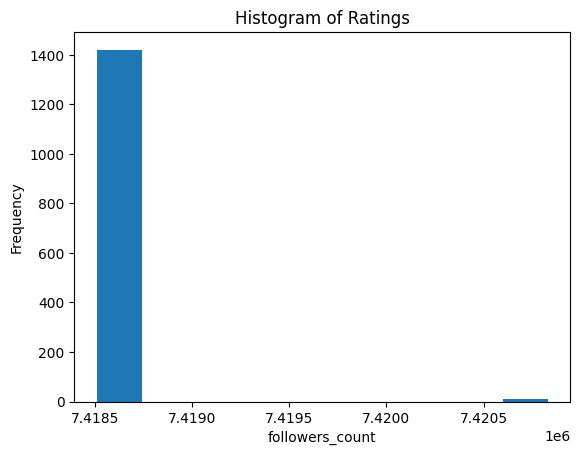

In [112]:
plt.hist(df_merged['followers_count'], bins=10)
plt.xlabel('followers_count')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

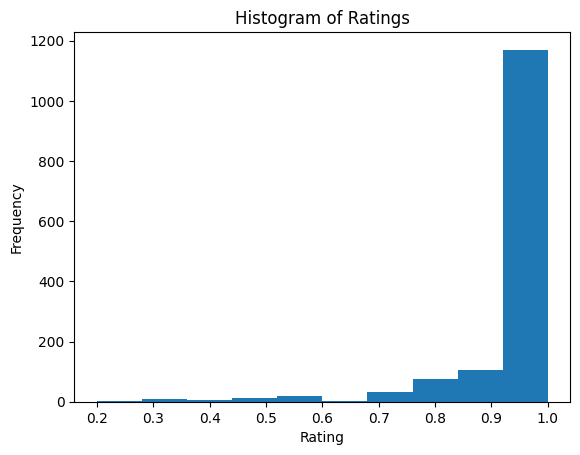

In [107]:
plt.hist(df_merged['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

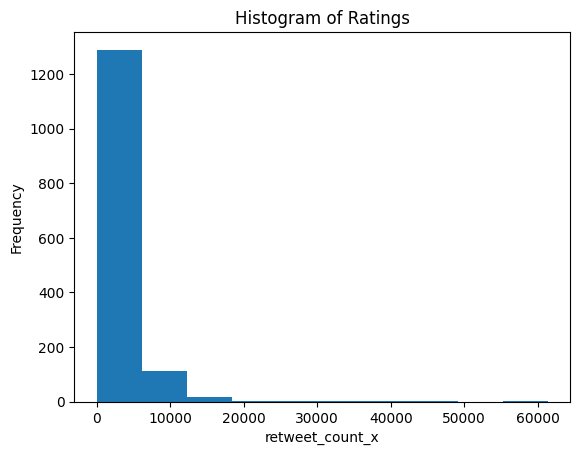

In [113]:
plt.hist(df_merged['retweet_count_x'], bins=10)
plt.xlabel('retweet_count_x')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()